In [9]:
from andi_datasets.models_phenom import models_phenom
from helpersMSD import *
from helpersGeneration import *
from helpersPlot import *
from trainSettingsImagesFeatures import *
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# number of time steps per trajectory (frames)
T = 200
# number of trajectories
N = 1
# Length of box (pixels), set to 0 to make them start at 0,0
L = 0 
# diffusion coefficient (pixels^2 / frame)
D = 3

out_dir = "outPoster/"

In [11]:
def gentrajs():
    trajs1, labels = models_phenom().single_state(N, 
                                    L = L,
                                    T = T,
                                    Ds = [1, 0.0], # Mean and variance
                                    alphas = 1)
    trajs5, labels = models_phenom().single_state(N, 
                                    L = L,
                                    T = T,
                                    Ds = [3, 0.0], # Mean and variance
                                    alphas = 1)
    """
    trajs10, labels = models_phenom().single_state(N, 
                                    L = L,
                                    T = T,
                                    Ds = [7, 0.0], # Mean and variance
                                    alphas = 1)"""
    trajs = np.concatenate(
        [trajs1,
          trajs5,
            #trajs10
            ]
            , axis=1)
    # Need to reshape generated trajectories because they are in format (T,N,dim), but we want them in (N,T,dim)
    trajs = trajs.transpose(1,0,2)
    # Labels are now in format (N,T,3): for each particle T times the tuple (alpha, D, state)
    print(trajs.shape)
    return trajs

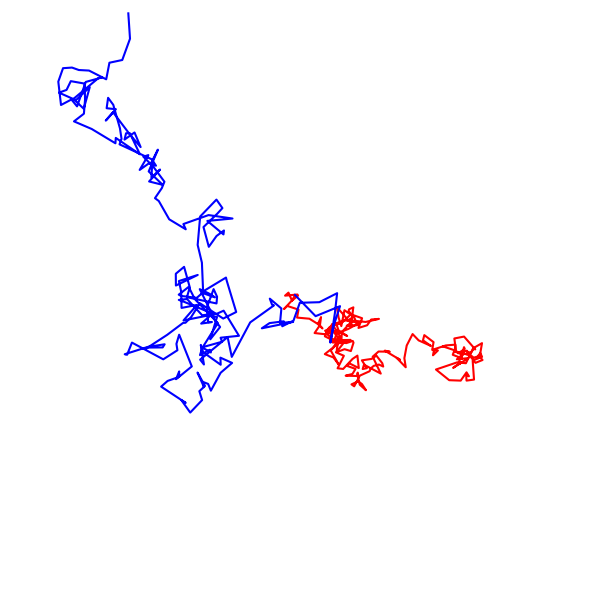

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trajectories(trajectories, savePath = None):
   plt.figure(figsize=(6, 6))
   colors = ['red', 'blue', 'green']
   
   for i, trajectory in enumerate(trajectories):
       plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors[i], linewidth=1.5)
   
   # Get current axis limits
   xlim = plt.xlim()
   ylim = plt.ylim()
   
   # Find the maximum range
   x_range = xlim[1] - xlim[0]
   y_range = ylim[1] - ylim[0]
   max_range = max(x_range, y_range)
   
   # Center the plot around (0, 0) with equal aspect ratio
   half_range = max_range / 2 + 10
   plt.xlim(-half_range, half_range)
   plt.ylim(-half_range, half_range)
   plt.gca().set_aspect('equal')
   
   plt.axis('off')
   plt.gca().set_facecolor('white')
   plt.tight_layout()
   
   if(savePath !=None):
    plt.savefig(out_dir+savePath, dpi=300, bbox_inches='tight', facecolor='white')
   plt.show()

#trajs = gentrajs()
trajs = np.load(out_dir+"trajs.npy")
#np.save(out_dir+"trajs",trajs)
plot_trajectories(trajs, "traj")

In [13]:
vid1 = trajectories_to_video_multiple_settings(trajs/50, nPosPerFrame, True, image_props)
print(len(vid1))
print(vid1[0].shape)


4
(2, 20, 9, 9)


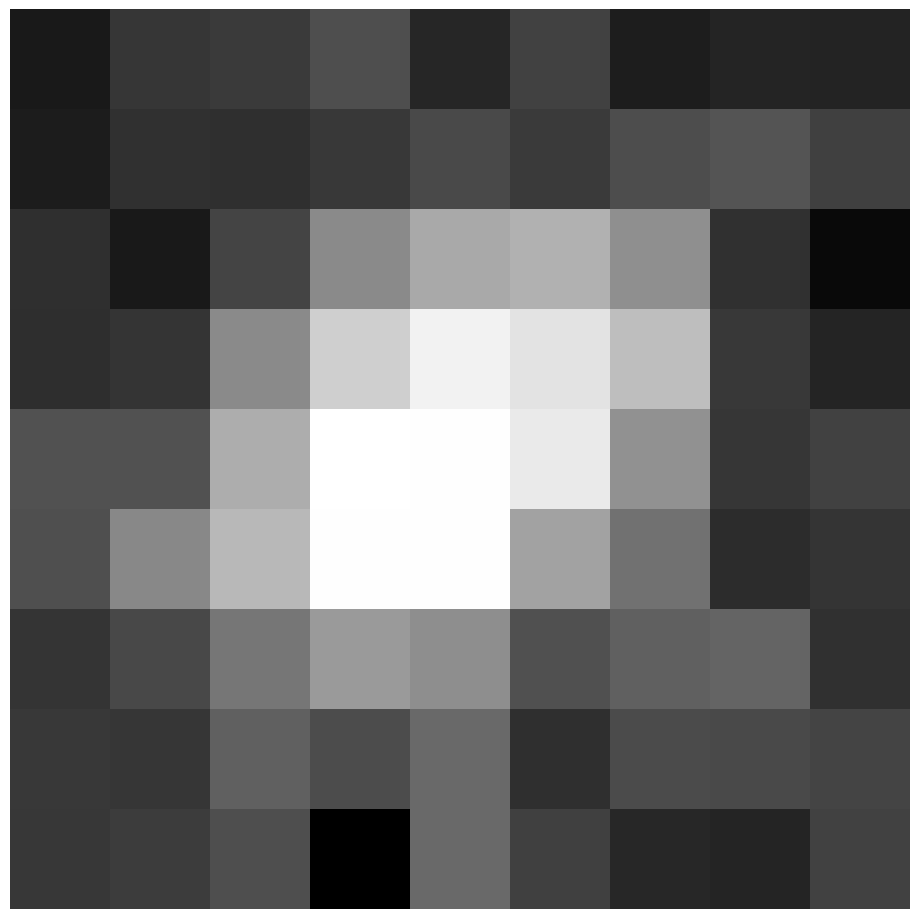

In [ ]:
import matplotlib.pyplot as plt

def save_image(image, filename):
   plt.figure(figsize=(9, 9))
   plt.imshow(image, cmap='gray')
   plt.axis('off')
   plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
   plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
   plt.show()
   plt.close()

save_image(vid1[3][1][6],"frameNoisy1")

In [15]:
play_video(vid1[0][1])


vmin: 0.09109415113925934 vmax: 4065.30322265625 mean: 479.69


(170, 512)


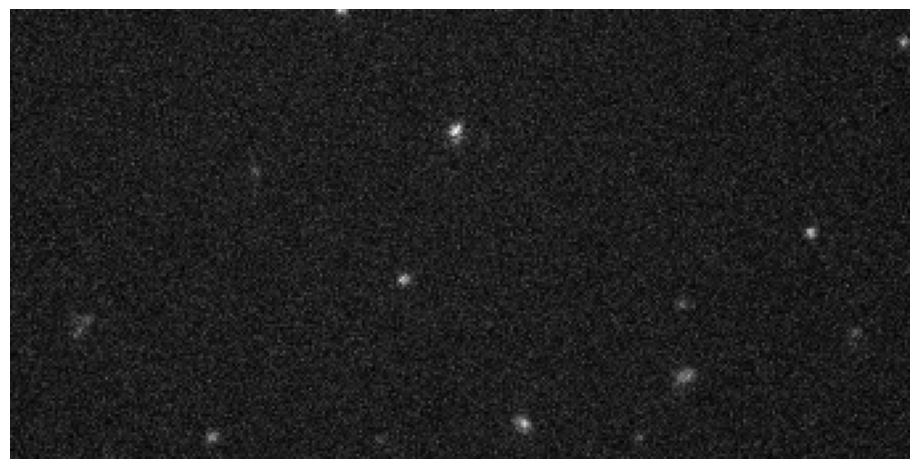

In [20]:
import tifffile as tiff
# Load the .tif file
image_3d = tiff.imread('real-data/70_01_7.tif')
frame0 = image_3d[0]
print(frame0.shape)

save_image(frame0[:,:340],  out_dir+"realFrame")